In [2]:
### Importing the libraries ###
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline
plt.rcParams['figure.figsize'] = (12.0 , 9.0)

In [3]:
### Importing the dataset ###
data = pd.read_csv('Salary_Data.csv')
data


,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [4]:
##Creating matrix of feature 
x = data.iloc[: , 0].values
##Creating Dependent variable vector
y = data.iloc[: , -1].values

In [5]:
x

array([ 1.1,  1.3,  1.5,  2. ,  2.2,  2.9,  3. ,  3.2,  3.2,  3.7,  3.9,
        4. ,  4. ,  4.1,  4.5,  4.9,  5.1,  5.3,  5.9,  6. ,  6.8,  7.1,
        7.9,  8.2,  8.7,  9. ,  9.5,  9.6, 10.3, 10.5])

In [6]:
y

array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
        54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
        61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
        98273., 101302., 113812., 109431., 105582., 116969., 112635.,
       122391., 121872.])

In [7]:
### Spliting dataset into training set and test set ###
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.2 , random_state = 1)

In [8]:
x_train

array([ 9.5,  2. ,  8.7,  7.9,  8.2,  2.2,  1.5,  9. ,  3. ,  5.9,  4.1,
        3.2,  9.6,  1.3,  5.1,  1.1,  4.9, 10.5, 10.3,  3.7,  3.2,  4. ,
        4. ,  2.9])

In [9]:
y_train

array([116969.,  43525., 109431., 101302., 113812.,  39891.,  37731.,
       105582.,  60150.,  81363.,  57081.,  54445., 112635.,  46205.,
        66029.,  39343.,  67938., 121872., 122391.,  57189.,  64445.,
        56957.,  55794.,  56642.])

In [10]:
x_test

array([5.3, 7.1, 3.9, 6. , 4.5, 6.8])

In [11]:
y_test

array([83088., 98273., 63218., 93940., 61111., 91738.])

In [12]:
### Training the Simple Linear Regression Model on the training set ###
#Building The model 
m = 0
c = 0

l = 0.001     # Learning rate
epochs = 20000  # The number of iterations to perform gradient descent

n = float(len(x_train))

# Performing Gradient Descent 
for i in range(epochs):
    h = m * x_train + c  # The current predicted value of Y
    D_m = (2/n) * sum(x_train * (h - y_train))  # Cost funtion derivative wrt m
    D_c = (2/n) * sum(h - y_train) # Cost function derivative wrt c

    m = m - l * D_m  #Update m
    c = c - l * D_c  #Update c

print(m, c)


9333.103748648557 25608.787808052257


In [13]:
# Making Predictions for both test and training set
li = []
for i in x_test:
    h = m * i + c
    li.append(h)
y_pred_test = np.array(li)
y_pred_test

array([75074.23767589, 91873.82442346, 62007.89242778, 81607.41029994,
       67607.75467697, 89073.89329886])

In [14]:
new_li = []
for i in x_train:
    h = m * i + c
    new_li.append(h)
y_pred_train = np.array(new_li)
y_pred_train

array([114273.27342021,  44274.99530535, 106806.79042129,  99340.30742238,
       102140.23854697,  46141.61605508,  39608.44343103, 109606.72154589,
        53608.099054  ,  80674.09992508,  63874.51317751,  55474.71980373,
       115206.58379508,  37741.8226813 ,  73207.61692616,  35875.20193157,
        71340.99617643, 123606.37716886, 121739.75641913,  60141.27167805,
        55474.71980373,  62941.20280265,  62941.20280265,  52674.78867913])

Text(0.5, 1.0, 'Salary vs Experience (Training Set)')

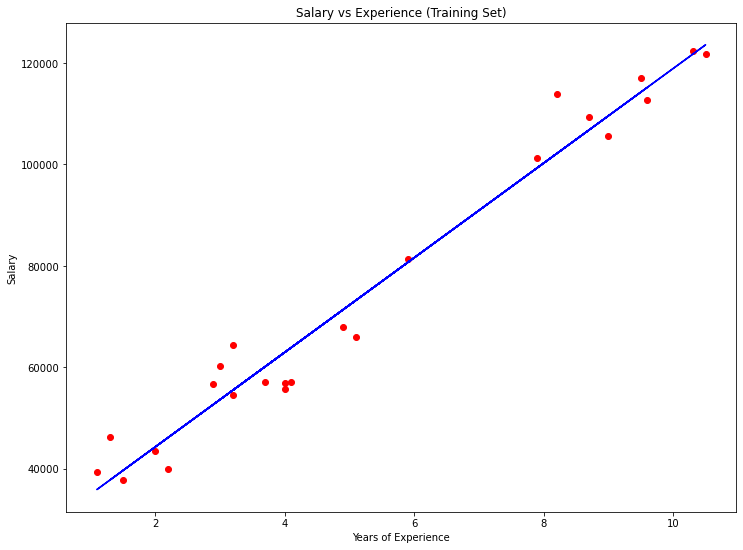

In [15]:
### Visualizing Training Set Results ###
plt.scatter(x_train , y_train , color = 'red')
plt.plot(x_train , y_pred_train , color = 'blue')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Salary vs Experience (Training Set)')

Text(0.5, 1.0, 'Salary vs Experience (Test Set)')

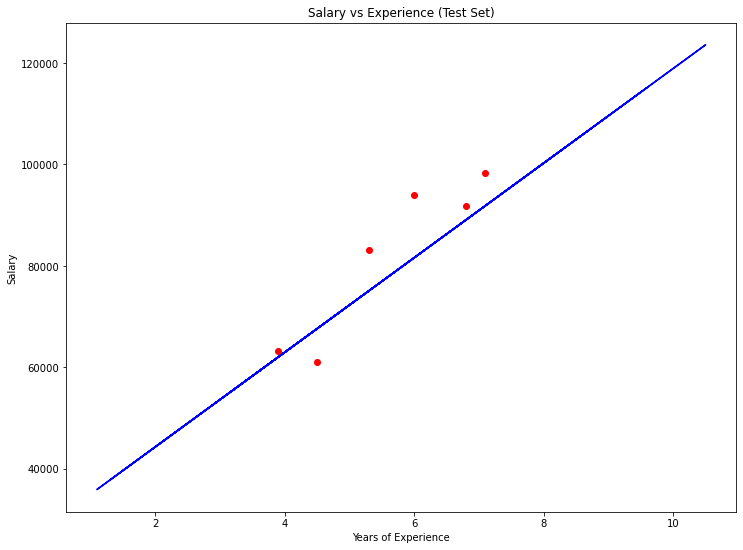

In [16]:
### Visualizing Test Set Results ###
plt.scatter(x_test , y_test , color = 'red')
plt.plot(x_train , y_pred_train , color = 'blue')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Salary vs Experience (Test Set)')